In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample

# Train data

## Read data and view general info

In [2]:
train_transaction_df = pd.read_csv('data/original_data/train_transaction.csv')
train_transaction_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
train_transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [4]:
train_identity_df = pd.read_csv('data/original_data/train_identity.csv')
train_identity_df.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [5]:
train_identity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

### Recreate the full dataset by mergeing with idenity features

In [6]:
train_df = pd.merge(train_transaction_df, train_identity_df, on='TransactionID', how='left')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


In [7]:
outer_train_df = pd.merge(train_transaction_df, train_identity_df, on='TransactionID', how='outer')
outer_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


In [7]:
train_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


## View classes distribution

In [8]:
train_df['isFraud'][:5]

0    0
1    0
2    0
3    0
4    0
Name: isFraud, dtype: int64

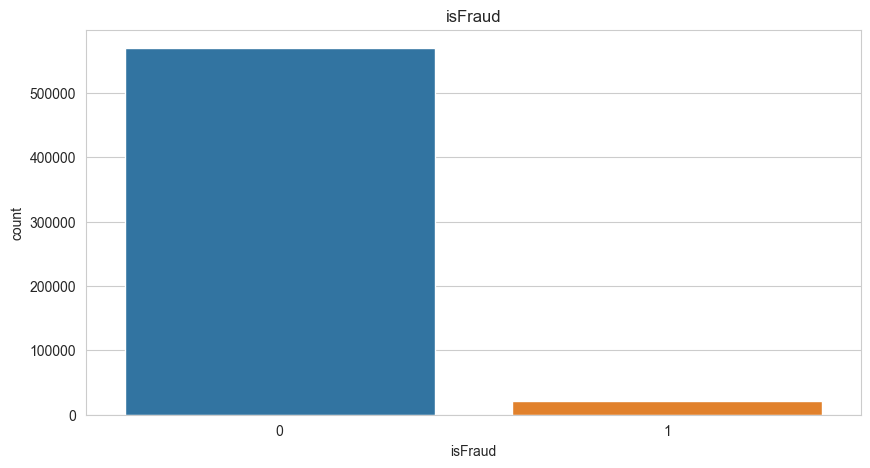

In [26]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=train_df, x='isFraud')
 
plt.title('isFraud')
plt.savefig('graphs/train_countplot.png')
plt.show()

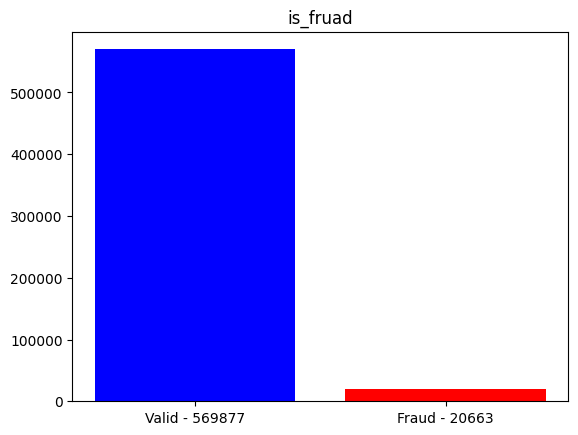

In [11]:
plt.rcdefaults()
# obtain ground truth from train column
is_fraud = train_df['isFraud'].values

# get counts of fruad and not fruad
__num_valid = np.sum(is_fraud == 0)
__num_fraud = is_fraud.size - __num_valid

plt.bar([0, 1], [__num_valid, __num_fraud], color=['blue', 'red'], tick_label=[f"Valid - {__num_valid}", f"Fraud - {__num_fraud}"])
plt.title('is_fruad')
plt.savefig('graphs/train_barplot.png')
plt.show()

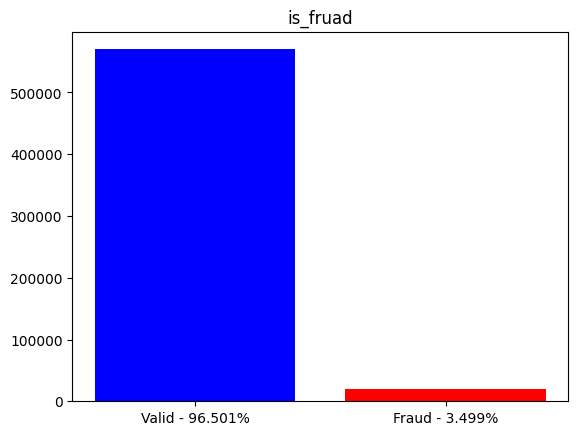

In [13]:
plt.rcdefaults()
# obtain ground truth from train column
is_fraud = train_df['isFraud'].values

# get counts of fruad and not fruad
__num_valid = np.sum(is_fraud == 0)
__num_fraud = is_fraud.size - __num_valid

plt.bar([0, 1], [__num_valid, __num_fraud], color=['blue', 'red'], tick_label=[f"Valid - {__num_valid/is_fraud.size * 100:.3f}%", 
                                                                               f"Fraud - {__num_fraud/is_fraud.size * 100:.3f}%"])
plt.title('is_fruad')
plt.savefig('graphs/train_barplot_percents.png')
plt.show()

## Data Cleaning

In [19]:
# Calculate the percentage of missing values for each column
missing_count = train_df.isnull().sum()

# Create a DataFrame with column names and their respective missing percentages
missing_info = pd.DataFrame({'column_name': train_df.columns, 'missing_count': missing_count})
missing_info.reset_index(drop=True, inplace=True)

missing_info.head()

,column_name,missing_count
0,TransactionID,0
1,isFraud,0
2,TransactionDT,0
3,TransactionAmt,0
4,ProductCD,0


In [30]:
missing_info = missing_info.sort_values(by='missing_count', ascending=False)
missing_info.reset_index(drop=True, inplace=True)
missing_info.head()

,column_name,missing_count
0,id_24,585793
1,id_25,585408
2,id_07,585385
3,id_08,585385
4,id_21,585381


In [31]:
missing_info.transpose()

,0,1,2,3,4,5,6,7,8,9,...,424,425,426,427,428,429,430,431,432,433
column_name,id_24,id_25,id_07,id_08,id_21,id_26,id_22,id_23,id_27,dist2,...,C14,C5,C13,C12,C11,C4,C8,C6,C10,TransactionID
missing_count,585793,585408,585385,585385,585381,585377,585371,585371,585371,552913,...,0,0,0,0,0,0,0,0,0,0


In [39]:
missing_info[315:325]

,column_name,missing_count
315,V17,76073
316,V31,76073
317,V15,76073
318,V20,76073
319,D10,76022
320,addr1,65706
321,addr2,65706
322,card2,8933
323,card5,4259
324,card4,1577


### Removal of Features with too many missing Values

In [40]:
MISSING_TOLERANCE = 9000 # if missing count over 9000 throw out the feature

num_missing_by_feature = train_df.isnull().sum()
features_to_remove = []

for feature, num_missing in num_missing_by_feature.items():
    if num_missing <= MISSING_TOLERANCE: continue
    features_to_remove.append(feature)

print(f"len(features_to_remove) = {len(features_to_remove)}")

len(features_to_remove) = 322


In [41]:
# drop features that cannot be recovered
train_df_features_removed = train_df.drop(columns=features_to_remove)

# show new shape
print(f'Training dataset form where features missing more than {MISSING_TOLERANCE} records have been removed: {train_df_features_removed.shape}')
train_df_features_removed.head()

Training dataset form where features missing more than 9000 records have been removed: (590540, 112)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
print(f"len(train_df) = {len(train_df)}")
print(f"len(train_df_features_removed) = {len(train_df_features_removed)}")

len(train_df) = 590540
len(train_df_features_removed) = 590540


In [44]:
# Calculate the percentage of missing values for each column
missing_count = train_df_features_removed.isnull().sum()

# Create a DataFrame with column names and their respective missing percentages
missing_info = pd.DataFrame({'column_name': train_df_features_removed.columns, 'missing_count': missing_count})
missing_info.reset_index(drop=True, inplace=True)
missing_info = missing_info.sort_values(by='missing_count', ascending=False)
missing_info.reset_index(drop=True, inplace=True)

missing_info.transpose()

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
column_name,card2,card5,card4,card6,card3,V281,V315,D1,V301,V300,...,C6,C7,C8,C9,C11,C12,C13,C14,isFraud,TransactionID
missing_count,8933,4259,1577,1571,1565,1269,1269,1269,1269,1269,...,0,0,0,0,0,0,0,0,0,0


### Save dataframe with removed_columns to a separate file 

In [46]:
train_df_features_removed.to_csv('data/removed_columns_data/train.csv', index=False)

#### Check the correctness of data saving

In [47]:
train_df_features_removed_test = pd.read_csv('data/removed_columns_data/train.csv')
train_df_features_removed_test.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
# Compare the two DataFrames, including NaN values
train_df_features_removed.equals(train_df_features_removed_test)

False

In [53]:
# Compare the two DataFrames, excluding NaN values
comparison = train_df_features_removed.compare(train_df_features_removed_test)

# Display the differences
print(comparison)

       V126        V127       V128       V129        V130        ... V317  \
       self other  self other self other self other  self other  ... self   
926     NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN   NaN   NaN  ...  NaN   
932     NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN   NaN   NaN  ...  NaN   
1834    NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN   NaN   NaN  ...  NaN   
2141    NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN   NaN   NaN  ...  NaN   
2176    NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN   NaN   NaN  ...  NaN   
...     ...   ...   ...   ...  ...   ...  ...   ...   ...   ...  ...  ...   
574529  NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN   NaN   NaN  ...  NaN   
578521  NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN   NaN   NaN  ...  NaN   
580102  NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN   NaN   NaN  ...  NaN   
584573  NaN   NaN  31.9  31.9  NaN   NaN  NaN   NaN  31.9  31.9  ...  NaN   
588284  NaN   NaN  31.9  31.9  NaN   NaN  NaN   NaN  31.9  31.9  ...  NaN   

In [54]:
# Calculate the percentage of missing values for each column
missing_count = train_df_features_removed_test.isnull().sum()

# Create a DataFrame with column names and their respective missing percentages
missing_info_test = pd.DataFrame({'column_name': train_df_features_removed_test.columns, 'missing_count': missing_count})
missing_info_test.reset_index(drop=True, inplace=True)
missing_info_test = missing_info_test.sort_values(by='missing_count', ascending=False)
missing_info_test.reset_index(drop=True, inplace=True)

missing_info_test.transpose()

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
column_name,card2,card5,card4,card6,card3,V281,V315,D1,V301,V300,...,C6,C7,C8,C9,C11,C12,C13,C14,isFraud,TransactionID
missing_count,8933,4259,1577,1571,1565,1269,1269,1269,1269,1269,...,0,0,0,0,0,0,0,0,0,0


In [55]:
missing_info.transpose()

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
column_name,card2,card5,card4,card6,card3,V281,V315,D1,V301,V300,...,C6,C7,C8,C9,C11,C12,C13,C14,isFraud,TransactionID
missing_count,8933,4259,1577,1571,1565,1269,1269,1269,1269,1269,...,0,0,0,0,0,0,0,0,0,0


In [56]:
missing_info.equals(missing_info_test)

True

In [57]:
print(f"len(train_df_features_removed) = {len(train_df_features_removed)}")
print(f"len(train_df_features_removed_test) = {len(train_df_features_removed_test)}")

len(train_df_features_removed) = 590540
len(train_df_features_removed_test) = 590540


### Remove records that do not reflect fraud (isFraud = False) for columns with a NaN value

In [29]:
train_df_features_removed = pd.read_csv('data/removed_columns_data/train.csv')
train_df_features_removed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 112 entries, TransactionID to V321
dtypes: float64(105), int64(4), object(3)
memory usage: 504.6+ MB


In [30]:
train_df_features_removed.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
pd.isna(train_df_features_removed.iloc[0]['card2'])

True

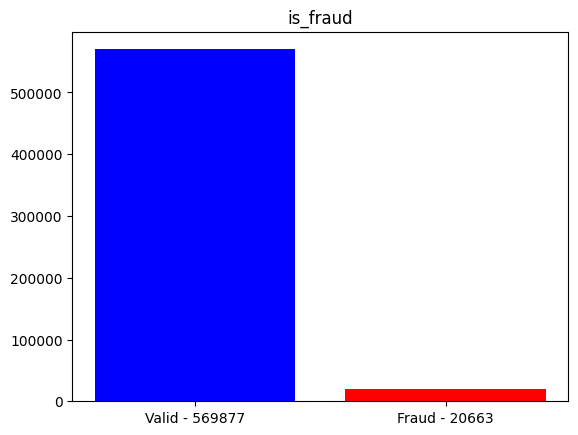

In [33]:
plt.rcdefaults()
# obtain ground truth from train column
is_fraud = train_df_features_removed['isFraud'].values

# get counts of fruad and not fruad
__num_valid = np.sum(is_fraud == 0)
__num_fraud = is_fraud.size - __num_valid

plt.bar([0, 1], [__num_valid, __num_fraud], color=['blue', 'red'], tick_label=[f"Valid - {__num_valid}", f"Fraud - {__num_fraud}"])
plt.title('is_fraud')
plt.show()

#### Firstly create df_train_is_fraud with only 'isFraud' == 1 values, df_to_clean and then concat them

In [34]:
train_df_features_removed['isFraud'].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

In [35]:
df_train_is_fraud = train_df_features_removed[train_df_features_removed['isFraud'] == 1]
len(df_train_is_fraud)

20663

In [36]:
df_to_clean = train_df_features_removed[train_df_features_removed['isFraud'] == 0]
len(df_to_clean)

569877

In [37]:
# Calculate the number of missing values for each column
missing_count = df_to_clean.isnull().sum()

# Create a DataFrame with column names and their respective missing percentages
missing_info = pd.DataFrame({'column_name': df_to_clean.columns, 'missing_count': missing_count})
missing_info = missing_info.sort_values(by='missing_count', ascending=False)
missing_info.reset_index(drop=True, inplace=True)
missing_info.transpose()

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
column_name,card2,card5,card4,card6,card3,V281,V315,D1,V301,V300,...,C6,C7,C8,C9,C11,C12,C13,C14,isFraud,TransactionID
missing_count,8510,4049,1536,1532,1526,1223,1223,1223,1223,1223,...,0,0,0,0,0,0,0,0,0,0


In [38]:
columns_with_NaN_values = missing_info[missing_info['missing_count'] > 0]['column_name'].values
len(columns_with_NaN_values)

92

In [39]:
df_to_clean.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
len(columns_with_NaN_values)

92

In [ ]:
for column_name in columns_with_NaN_values[10:]:
    print(f"column_name = {column_name}")
    print(f"len(df_to_clean) before = {len(df_to_clean)}")
    df_to_clean = df_to_clean[df_to_clean[column_name].isnull() == False]
    print(f"len(df_to_clean) after = {len(df_to_clean)}")

In [44]:
# Calculate the number of missing values for each column
missing_count = df_to_clean.isnull().sum()

# Create a DataFrame with column names and their respective missing percentages
missing_info = pd.DataFrame({'column_name': df_to_clean.columns, 'missing_count': missing_count})
missing_info = missing_info.sort_values(by='missing_count', ascending=False)
missing_info.reset_index(drop=True, inplace=True)
missing_info.transpose()

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
column_name,TransactionID,isFraud,V292,V291,V290,V289,V288,V287,V286,V285,...,V107,V106,V105,V104,V103,V102,V101,V100,V99,V321
missing_count,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### concat df_train_is_fraud and df_to_clean

In [46]:
df_train_is_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20663 entries, 203 to 590526
Columns: 112 entries, TransactionID to V321
dtypes: float64(105), int64(4), object(3)
memory usage: 17.8+ MB


In [47]:
df_to_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558065 entries, 1 to 590539
Columns: 112 entries, TransactionID to V321
dtypes: float64(105), int64(4), object(3)
memory usage: 481.1+ MB


In [52]:
train_df = pd.concat([df_train_is_fraud, df_to_clean])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578728 entries, 203 to 590539
Columns: 112 entries, TransactionID to V321
dtypes: float64(105), int64(4), object(3)
memory usage: 498.9+ MB


In [53]:
train_df['isFraud'].value_counts()

0    558065
1     20663
Name: isFraud, dtype: int64

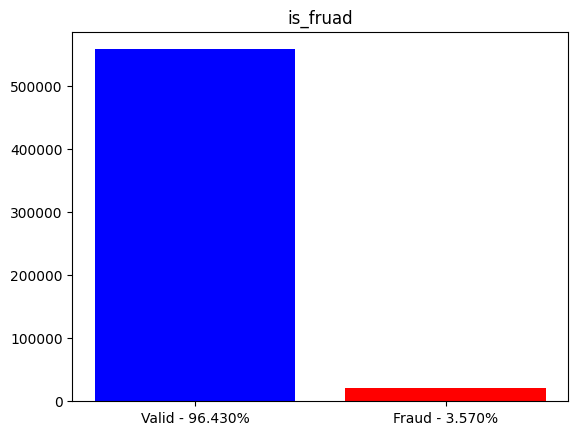

In [54]:
plt.rcdefaults()
# obtain ground truth from train column
is_fraud = train_df['isFraud'].values

# get counts of fruad and not fruad
__num_valid = np.sum(is_fraud == 0)
__num_fraud = is_fraud.size - __num_valid

plt.bar([0, 1], [__num_valid, __num_fraud], color=['blue', 'red'], tick_label=[f"Valid - {__num_valid/is_fraud.size * 100:.3f}%", 
                                                                               f"Fraud - {__num_fraud/is_fraud.size * 100:.3f}%"])
plt.title('is_fruad')
plt.savefig('graphs/cleaned_train_barplot_percents.png')
plt.show()

In [55]:
train_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
203,2987203,1,89760,445.000,W,18268,583.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
240,2987240,1,90193,37.098,C,13413,103.0,185.0,visa,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243,2987243,1,90246,37.098,C,13413,103.0,185.0,visa,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
245,2987245,1,90295,37.098,C,13413,103.0,185.0,visa,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
288,2987288,1,90986,155.521,C,16578,545.0,185.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
train_df.reset_index(drop='index', inplace=True)
train_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987203,1,89760,445.000,W,18268,583.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2987240,1,90193,37.098,C,13413,103.0,185.0,visa,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987243,1,90246,37.098,C,13413,103.0,185.0,visa,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987245,1,90295,37.098,C,13413,103.0,185.0,visa,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2987288,1,90986,155.521,C,16578,545.0,185.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
train_df.drop('Unnamed: 0', axis=1, inplace=True)
train_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987203,1,89760,445.000,W,18268,583.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2987240,1,90193,37.098,C,13413,103.0,185.0,visa,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987243,1,90246,37.098,C,13413,103.0,185.0,visa,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987245,1,90295,37.098,C,13413,103.0,185.0,visa,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2987288,1,90986,155.521,C,16578,545.0,185.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
train_df.to_csv('data/cleaned_data/train.csv', index=False)

## Fill in the missing values ​​of the train_df dataframe

In [81]:
train_df = pd.read_csv('data/cleaned_data/train.csv')
train_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987203,1,89760,445.000,W,18268,583.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2987240,1,90193,37.098,C,13413,103.0,185.0,visa,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987243,1,90246,37.098,C,13413,103.0,185.0,visa,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987245,1,90295,37.098,C,13413,103.0,185.0,visa,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2987288,1,90986,155.521,C,16578,545.0,185.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


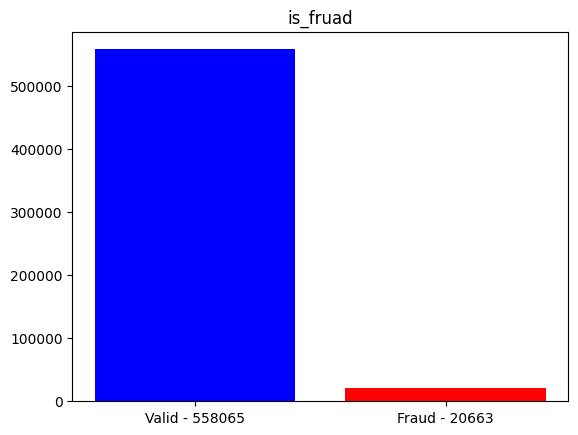

In [82]:
plt.rcdefaults()
# obtain ground truth from train column
is_fraud = train_df['isFraud'].values

# get counts of fruad and not fruad
__num_valid = np.sum(is_fraud == 0)
__num_fraud = is_fraud.size - __num_valid

plt.bar([0, 1], [__num_valid, __num_fraud], color=['blue', 'red'], tick_label=[f"Valid - {__num_valid}", 
                                                                               f"Fraud - {__num_fraud}"])
plt.title('is_fruad')
# plt.savefig('graphs/cleaned_train_barplot_percents.png')
plt.show()

In [83]:
# Calculate the number of missing values for each column
missing_count = train_df.isnull().sum()

# Create a DataFrame with column names and their respective missing percentages
missing_info = pd.DataFrame({'column_name': train_df.columns, 'missing_count': missing_count})
missing_info = missing_info.sort_values(by='missing_count', ascending=False)
missing_info.reset_index(drop=True, inplace=True)
missing_info.transpose()

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
column_name,card2,card5,V281,D1,V301,V300,V313,V314,V315,V282,...,C6,C7,C8,C9,C11,C12,C13,C14,isFraud,TransactionID
missing_count,423,210,46,46,46,46,46,46,46,46,...,0,0,0,0,0,0,0,0,0,0


In [84]:
missing_column_names = missing_info[missing_info['missing_count'] > 0]['column_name']
len(missing_column_names)

92

#### Fill records with 'NaN' value with mode value

In [85]:
columns_counter = 0
for missing_column in missing_column_names:
    # Calculate the mode of the current column
    mode_value = train_df[missing_column].mode().iloc[0]  # Use iloc[0] to get the first mode if multiple modes exist

    # Replace NaN values in the current column with the mode
    train_df[missing_column].fillna(mode_value, inplace=True)
    columns_counter += 1

print(f"columns_counter = {columns_counter}")

columns_counter = 92


In [86]:
# Calculate the number of missing values for each column
missing_count = train_df.isnull().sum()

# Create a DataFrame with column names and their respective missing percentages
missing_info = pd.DataFrame({'column_name': train_df.columns, 'missing_count': missing_count})
missing_info = missing_info.sort_values(by='missing_count', ascending=False)
missing_info.reset_index(drop=True, inplace=True)
missing_info.transpose()

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
column_name,TransactionID,isFraud,V292,V291,V290,V289,V288,V287,V286,V285,...,V107,V106,V105,V104,V103,V102,V101,V100,V99,V321
missing_count,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
train_df.to_csv('data/cleaned_data/mode_train.csv', index=False)

## Categorical features coding

In [90]:
train_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987203,1,89760,445.000,W,18268,583.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2987240,1,90193,37.098,C,13413,103.0,185.0,visa,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987243,1,90246,37.098,C,13413,103.0,185.0,visa,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987245,1,90295,37.098,C,13413,103.0,185.0,visa,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2987288,1,90986,155.521,C,16578,545.0,185.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
columns = train_df.columns
columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=112)

In [92]:
all_categorical_columns = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain',
                          'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo']
for i in range(12, 39):
    all_categorical_columns.append(f"id_{i}")

len(all_categorical_columns)

49

In [93]:
cat_columns_counter = 0
for cat_column in all_categorical_columns:
    if cat_column in train_df.columns:
        cat_columns_counter += 1
        print(f"{cat_column} is present in the train_df")

print(f"The number of categorical columns in the training dataset: {cat_columns_counter}")

ProductCD is present in the train_df
card1 is present in the train_df
card2 is present in the train_df
card3 is present in the train_df
card4 is present in the train_df
card5 is present in the train_df
card6 is present in the train_df
The number of categorical columns in the training dataset: 7


In [94]:
for i in range(1, 7):
    print(f"len(train_df['card{i}'].unique()) = {len(train_df[f'card{i}'].unique())}")

len(train_df['card1'].unique()) = 13188
len(train_df['card2'].unique()) = 500
len(train_df['card3'].unique()) = 107
len(train_df['card4'].unique()) = 4
len(train_df['card5'].unique()) = 117
len(train_df['card6'].unique()) = 4


### 'ProductCD' column

In [95]:
train_df['ProductCD'].unique()

array(['W', 'C', 'R', 'S', 'H'], dtype=object)

In [96]:
productCD_dict = {'W': 0, 'C': 1, 'R': 2, 'S': 3, 'H': 4}
train_df['ProductCD'] = train_df['ProductCD'].apply(lambda label: productCD_dict[label])
train_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987203,1,89760,445.000,0,18268,583.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2987240,1,90193,37.098,1,13413,103.0,185.0,visa,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987243,1,90246,37.098,1,13413,103.0,185.0,visa,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987245,1,90295,37.098,1,13413,103.0,185.0,visa,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2987288,1,90986,155.521,1,16578,545.0,185.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
train_df['ProductCD'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

### 'card4' column

In [98]:
train_df['card4'].unique()

array(['visa', 'mastercard', 'discover', 'american express'], dtype=object)

In [99]:
card4_dict = {'visa': 0, 'mastercard': 1, 'discover': 2, 'american express': 3}
train_df['card4'] = train_df['card4'].apply(lambda label: card4_dict[label])
train_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987203,1,89760,445.000,0,18268,583.0,150.0,0,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2987240,1,90193,37.098,1,13413,103.0,185.0,0,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987243,1,90246,37.098,1,13413,103.0,185.0,0,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987245,1,90295,37.098,1,13413,103.0,185.0,0,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2987288,1,90986,155.521,1,16578,545.0,185.0,0,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
train_df['card4'].unique()

array([0, 1, 2, 3], dtype=int64)

### 'card6' column

In [101]:
train_df['card6'].unique()

array(['credit', 'debit', 'debit or credit', 'charge card'], dtype=object)

In [102]:
train_df[['card5', 'card6']][:5]

,card5,card6
0,226.0,credit
1,137.0,credit
2,137.0,credit
3,137.0,credit
4,226.0,credit


In [103]:
card6_dict = {'credit': 0, 'debit': 1, 'debit or credit': 2, 'charge card': 3}
train_df['card6'] = train_df['card6'].apply(lambda label: card6_dict[label])
train_df[['card5', 'card6']][:5]

,card5,card6
0,226.0,0
1,137.0,0
2,137.0,0
3,137.0,0
4,226.0,0


In [104]:
train_df['card6'].unique()

array([0, 1, 2, 3], dtype=int64)

### 'card1', 'card2', 'card3', 'card5' columns

In [105]:
train_df['card1'].unique()

array([18268, 13413, 16578, ..., 17972, 13166,  8767], dtype=int64)

In [107]:
type(train_df['card2'].iloc[0])

numpy.float64

In [109]:
type(train_df['card3'].iloc[0])

numpy.float64

In [110]:
type(train_df['card5'].iloc[0])

numpy.float64

### Save the results to a separate file

In [113]:
train_df[['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6']].head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6
0,2987203,1,89760,445.000,0,18268,583.0,150.0,0,226.0,0
1,2987240,1,90193,37.098,1,13413,103.0,185.0,0,137.0,0
2,2987243,1,90246,37.098,1,13413,103.0,185.0,0,137.0,0
3,2987245,1,90295,37.098,1,13413,103.0,185.0,0,137.0,0
4,2987288,1,90986,155.521,1,16578,545.0,185.0,0,226.0,0


In [116]:
train_df.to_csv('data/final_data/numerical_train.csv', index=False)

## Balance the dataset

In [2]:
df = pd.read_csv('data/final_data/numerical_train.csv')
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987203,1,89760,445.000,0,18268,583.0,150.0,0,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2987240,1,90193,37.098,1,13413,103.0,185.0,0,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987243,1,90246,37.098,1,13413,103.0,185.0,0,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987245,1,90295,37.098,1,13413,103.0,185.0,0,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2987288,1,90986,155.521,1,16578,545.0,185.0,0,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578728 entries, 0 to 578727
Columns: 112 entries, TransactionID to V321
dtypes: float64(105), int64(7)
memory usage: 494.5 MB


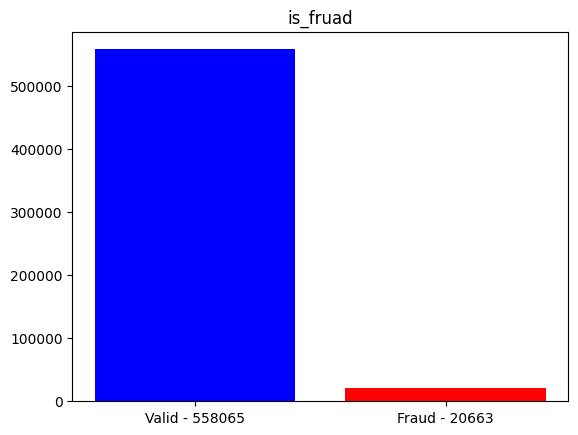

In [4]:
plt.rcdefaults()
# obtain ground truth from train column
is_fraud = df['isFraud'].values

# get counts of fruad and not fruad
__num_valid = np.sum(is_fraud == 0)
__num_fraud = is_fraud.size - __num_valid

plt.bar([0, 1], [__num_valid, __num_fraud], color=['blue', 'red'], tick_label=[f"Valid - {__num_valid}", f"Fraud - {__num_fraud}"])
plt.title('is_fruad')
plt.savefig('graphs/train_barplot_before_balancing.png')
plt.show()

In [11]:
# Assuming you have a DataFrame named 'df' with a target column 'target' (0 or 1)
# Split the dataset into majority and minority classes
majority_class = df[df['isFraud'] == 0]
minority_class = df[df['isFraud'] == 1]

# Downsample the majority class to match the size of the minority class
majority_downsampled = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)

# Combine the downsampled majority class with the minority class to create a balanced dataset
df = pd.concat([minority_class, majority_downsampled])
len(df)

41326

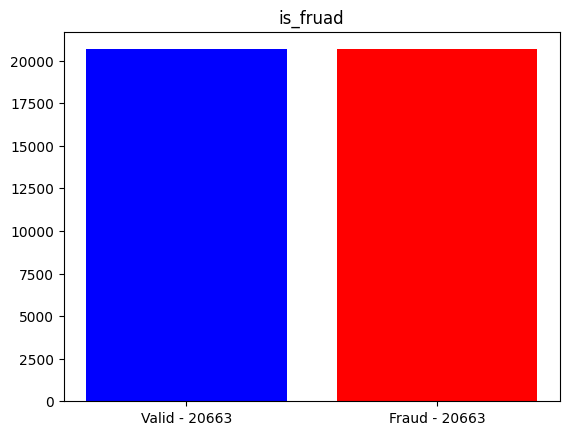

In [12]:
plt.rcdefaults()
# obtain ground truth from train column
is_fraud = df['isFraud'].values

# get counts of fruad and not fruad
__num_valid = np.sum(is_fraud == 0)
__num_fraud = is_fraud.size - __num_valid

plt.bar([0, 1], [__num_valid, __num_fraud], color=['blue', 'red'], tick_label=[f"Valid - {__num_valid}", f"Fraud - {__num_fraud}"])
plt.title('is_fruad')
plt.savefig('graphs/train_barplot_after_balancing.png')
plt.show()

In [ ]:
df.to_csv('data/final_data/balanced_train.csv', index=False)